In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import random

from utils.shapelets_transform import *
from utils.quality_measures import *

In [2]:
np.random.seed(42)

## Data

In [3]:
data = np.load('datasets/preprocessed_datasets/synthetic_dataset.npz')
x_train = data['array1']
y_train = data['array2']
x_test = data['array3']
y_test = data['array4']

## Models

In [4]:
# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM (Linear)": SVC(kernel='linear'),
    "1-NN": KNeighborsClassifier(n_neighbors=1),
    "Decision Tree": DecisionTreeClassifier(),
}

In [5]:
def train_models(x_train, y_train, x_test, y_test):
    # Train and evaluate models
    results = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        results[name] = accuracy
        
    return results

## Shapelet extraction

In [6]:
min_max = estimate_min_and_max(x_train, y_train, compute_f_stat)

100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


In [7]:
print(f"The proposed minimal length for shapelets {min_max[0]}") 
print(f"The proposed maximal length for shapelets {min_max[1]}") 

The proposed minimal length for shapelets 7
The proposed maximal length for shapelets 13


In [8]:
x_shapelet = shapelet_cached_selection(x_train, y_train, 20, 30, 100, compute_f_stat, verbose=1)

100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


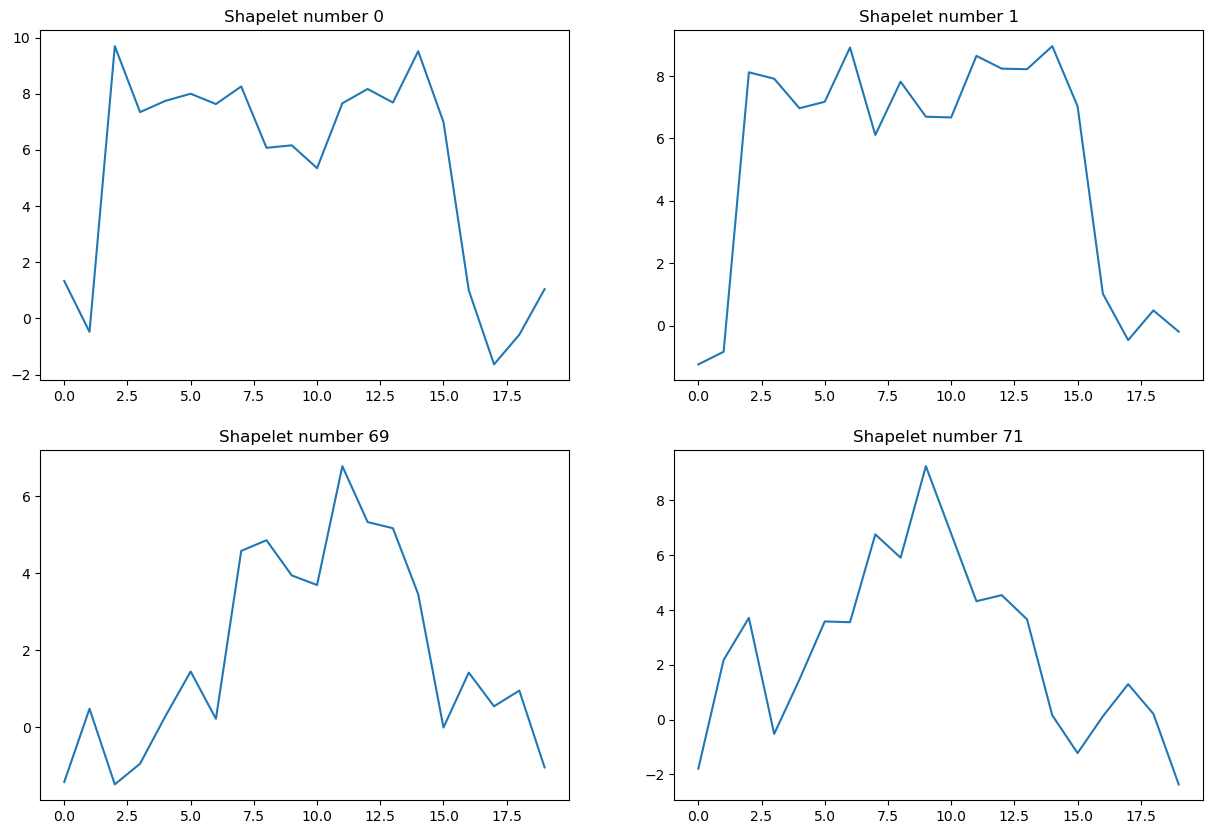

In [20]:
shapelet_idx = [0, 1, 69, 71]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, idx in enumerate(shapelet_idx):
    axes[i//2][i%2].plot(x_shapelet[idx][0])
    axes[i//2][i%2].set_title(f"Shapelet number {idx}")

## Build clusters

In [10]:
res_list = []

for shap in x_shapelet:
    res_list.append(shap[0])

In [11]:
clusters = cluster_shapelets(res_list, 8)

In [12]:
list_cluster = []

for c in clusters:
    list_cluster.append(list(c))
    
list_cluster.sort(key=lambda x: -len(x))

In [13]:
print("Number of shapelets in each cluster :")

for i in range(len(clusters)):
    print(f"Cluster {i} : {len(list_cluster[i])} shapelets")

Number of shapelets in each cluster :
Cluster 0 : 51 shapelets
Cluster 1 : 42 shapelets
Cluster 2 : 2 shapelets
Cluster 3 : 1 shapelets
Cluster 4 : 1 shapelets
Cluster 5 : 1 shapelets
Cluster 6 : 1 shapelets
Cluster 7 : 1 shapelets


In [14]:
## Keep only the most significant clusters
list_cluster = list_cluster[:2]

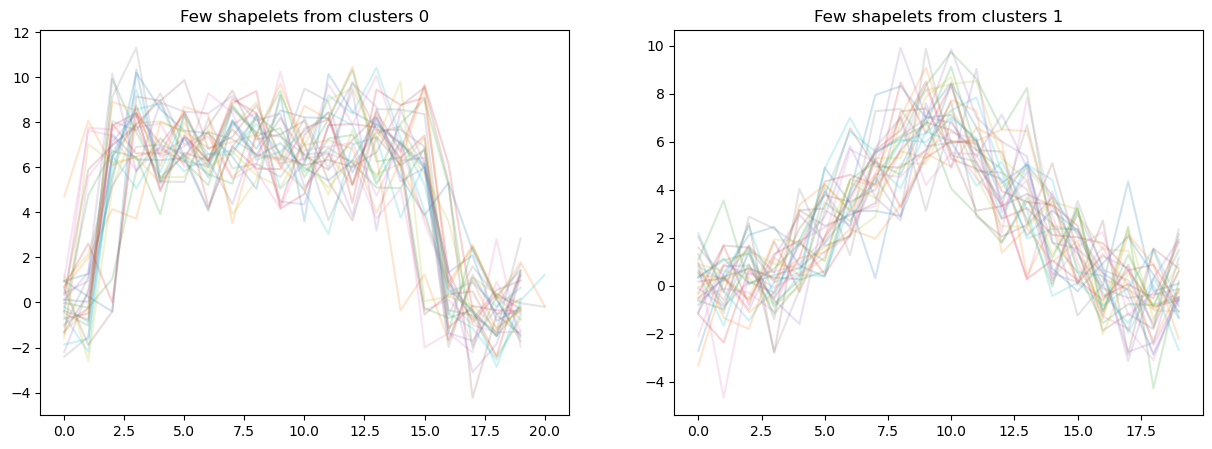

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i in range(2):
    for k in range(30):
        axes[i].plot(list_cluster[i][k], alpha=0.2)
    
    axes[i].set_title(f"Few shapelets from clusters {i}")

## Train and test the models

#### With shapelet-transformed dataset

In [16]:
transformed_x_train = shapelets_transform(res_list, x_train)
transformed_x_test = shapelets_transform(res_list, x_test)

print("--Results on shapelet-transformed dataset--")
results = train_models(transformed_x_train, y_train, transformed_x_test, y_test)
for key, value in results.items():
    print(key, ":", value)
print("--Results on raw dataset--")
results = train_models(x_train, y_train, x_test, y_test)
for key, value in results.items():
    print(key, ":", value)

--Results on shapelet-transformed dataset--
Naive Bayes : 1.0
Random Forest : 0.998
SVM (Linear) : 1.0
1-NN : 1.0
Decision Tree : 0.964
--Results on raw dataset--
Naive Bayes : 0.913
Random Forest : 0.95
SVM (Linear) : 0.936
1-NN : 0.997
Decision Tree : 0.763


#### With cluster-transformed dataset

In [17]:
transformed_x_train = shapelets_cluster_transform(list_cluster, x_train)
transformed_x_test = shapelets_cluster_transform(list_cluster, x_test)

train_models(transformed_x_train, y_train, transformed_x_test, y_test)

print("--Results on shapelet-transformed dataset--")
results = train_models(transformed_x_train, y_train, transformed_x_test, y_test)
for key, value in results.items():
    print(key, ":", value)
print("--Results on raw dataset--")
results = train_models(x_train, y_train, x_test, y_test)
for key, value in results.items():
    print(key, ":", value)

--Results on shapelet-transformed dataset--
Naive Bayes : 0.998
Random Forest : 0.994
SVM (Linear) : 1.0
1-NN : 1.0
Decision Tree : 0.999
--Results on raw dataset--
Naive Bayes : 0.913
Random Forest : 0.956
SVM (Linear) : 0.936
1-NN : 0.997
Decision Tree : 0.764
